In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd

In [36]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [38]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [39]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [40]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [42]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [43]:
columns_m = inspector.get_columns('measurement')
for c in columns_m:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [44]:
columns_s = inspector.get_columns('station')
for c in columns_s:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [46]:
# Query All Records in the the Database
data = engine.execute("SELECT * FROM measurement")
print(data)
# for record in data:
#     print(record)
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [47]:
station_df = pd.read_sql("SELECT * FROM station", conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

year_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).all()

year_prcp_df = pd.DataFrame(year_query)
year_prcp_df.set_index('date', inplace=True)

year_prcp_df

2016-08-23


,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


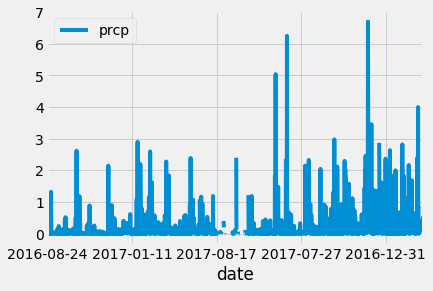

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data

year_prcp_df.plot()

# ax.set_xlabel("date")
# plt.xlabel("")
plt.show()

# ax1 = plt.axes()
# # x_axis = ax1.axes.get_xaxis()
# # x_axis.set_visible(False)
# ax1.set_xlabel("date")
# plt.show()
# plt.close()

![precipitation](Images/precipitation.png)

In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data

year_prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [51]:
# Design a query to show how many stations are available in this dataset?

unique_stations_df = pd.read_sql_query('SELECT DISTINCT station FROM measurement', conn)
unique_stations_df

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations_df = pd.read_sql_query('SELECT station, COUNT(*) as count FROM measurement GROUP BY station ORDER BY count DESC', conn)
active_stations_df

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [53]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

top_station_df = pd.read_sql_query('SELECT m.id, m.station, s.name, s.id, m.date, m.prcp, s.latitude, s.longitude, s.elevation, m.tobs FROM measurement AS m INNER JOIN station AS s ON (m.station = s.station) WHERE m.station = "USC00519281"', conn)

print(top_station_df['tobs'].min())

print(top_station_df['tobs'].max())

print(top_station_df['tobs'].mean())

top_station_df


54.0
85.0
71.66378066378067


,id,station,name,id,date,prcp,latitude,longitude,elevation,tobs
0,12188,USC00519281,"WAIHEE 837.5, HI US",7,2010-01-01,0.15,21.45167,-157.84889,32.9,70.0
1,12189,USC00519281,"WAIHEE 837.5, HI US",7,2010-01-02,0.00,21.45167,-157.84889,32.9,62.0
2,12190,USC00519281,"WAIHEE 837.5, HI US",7,2010-01-03,0.00,21.45167,-157.84889,32.9,74.0
3,12191,USC00519281,"WAIHEE 837.5, HI US",7,2010-01-04,0.00,21.45167,-157.84889,32.9,75.0
4,12192,USC00519281,"WAIHEE 837.5, HI US",7,2010-01-05,0.00,21.45167,-157.84889,32.9,74.0
...,...,...,...,...,...,...,...,...,...,...
2767,14955,USC00519281,"WAIHEE 837.5, HI US",7,2017-08-14,0.00,21.45167,-157.84889,32.9,77.0
2768,14956,USC00519281,"WAIHEE 837.5, HI US",7,2017-08-15,0.32,21.45167,-157.84889,32.9,77.0
2769,14957,USC00519281,"WAIHEE 837.5, HI US",7,2017-08-16,0.12,21.45167,-157.84889,32.9,76.0
2770,14958,USC00519281,"WAIHEE 837.5, HI US",7,2017-08-17,0.01,21.45167,-157.84889,32.9,76.0


In [54]:
# Choose the station with the highest number of temperature observations.

active_stations_df = pd.read_sql_query('SELECT station, COUNT(*) as count FROM measurement GROUP BY station ORDER BY count DESC', conn)
active_stations_df

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [55]:
# Query the last 12 months of temperature observation data for this station...

# Latest Date
print(session.query(Measurement.date).order_by(Measurement.date.desc()).first())

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

year_query_tobs = session.query(Measurement.station,
                                Measurement.date,
                                Measurement.tobs,
                                ).\
    filter(Measurement.date > year_ago).all()
year_query_tobs
year_tobs_df = pd.DataFrame(year_query_tobs)
year_tobs_df


top_station_tobs = year_tobs_df[year_tobs_df['station']=='USC00519281']
top_station_tobs

('2017-08-23',)
2016-08-23


,station,date,tobs
1524,USC00519281,2016-08-24,77.0
1525,USC00519281,2016-08-25,80.0
1526,USC00519281,2016-08-26,80.0
1527,USC00519281,2016-08-27,75.0
1528,USC00519281,2016-08-28,73.0
...,...,...,...
1870,USC00519281,2017-08-14,77.0
1871,USC00519281,2017-08-15,77.0
1872,USC00519281,2017-08-16,76.0
1873,USC00519281,2017-08-17,76.0


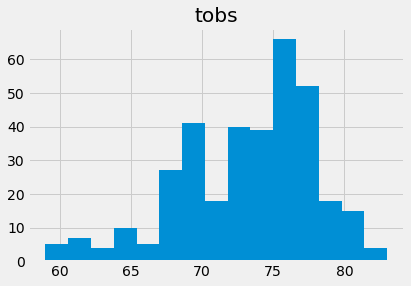

In [56]:
# ...and plot the results as a histogram

top_station_hist = top_station_tobs[['date','tobs']]
top_station_hist

tobs_hist = top_station_hist.hist(bins=15)

![precipitation](Images/station-histogram.png)

In [57]:
# # This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# # and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# # function usage example
# print(calc_temps('2012-02-28', '2012-03-05'))

In [58]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Holiday dates 
holiday_temps = calc_temps('2013-02-13', '2013-03-07')
holiday_temps



[(58.0, 69.65921787709497, 76.0)]

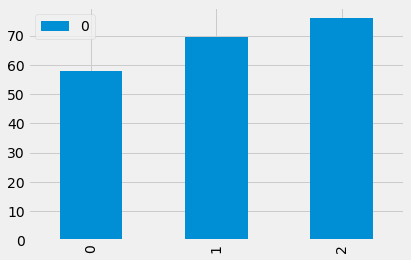

In [68]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

holiday_temps_df = pd.DataFrame([holiday_temps[0][i] for i in range(len(holiday_temps[0]))])

holiday_temps_df

ax = holiday_temps_df.plot(kind='bar')

In [60]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [61]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [62]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [63]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [64]:
# Plot the daily normals as an area plot with `stacked=False`
